<a href="https://colab.research.google.com/github/Kimgabe/AIFFEL_DLthone/blob/main/%5BKimgabe%5D_99_acc_%EC%A0%84%EC%9D%B4%EB%AA%A8%EB%8D%B8%EB%A1%9C_%EC%99%B8%EB%B6%80%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%9D%BC%EB%B2%A8%EB%A7%81%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import lib

In [9]:
# 기본 데이터 조작을 위한 라이브러리 불러오기
import pandas as pd  # 데이터프레임을 다루기 위한 Pandas 라이브러리
import numpy as np  # 배열 및 수치 연산을 위한 NumPy 라이브러리

# 이미지 처리를 위한 라이브러리 불러오기
from PIL import Image  # 이미지 처리를 위한 Python Imaging Library (PIL)
import matplotlib.pyplot as plt  # 그래프 및 이미지 시각화를 위한 Matplotlib 라이브러리

# 파일 경로 다루기 위한 라이브러리 불러오기
import time  # 시간 관련 작업을 위한 Time 라이브러리

# PyTorch 관련 라이브러리 불러오기
import torch  # 딥 러닝 프레임워크인 PyTorch
import torch.nn as nn  # 신경망 모델을 정의하기 위한 PyTorch 라이브러리
import torch.nn.functional as F  # 신경망 함수 및 연산을 위한 라이브러리
import torch.optim as optim  # 최적화 알고리즘을 위한 PyTorch 라이브러리
from torch.optim import lr_scheduler  # 학습률 스케줄러를 위한 PyTorch 라이브러리
from torchvision import models  # 사전 훈련된 모델 아키텍처를 포함하는 torchvision 라이브러리
from torchvision.datasets import ImageFolder  # 이미지 폴더 데이터셋을 다루기 위한 torchvision 라이브러리
! pip install torchsummary  # 모델 요약 정보를 보기 위한 torchsummary 라이브러리
import torchsummary

# PyTorch 데이터셋을 위한 필수 라이브러리
from torch.utils.data.sampler import SubsetRandomSampler  # 무작위로 샘플을 선택하는 PyTorch 라이브러리
from torch.utils.data import Dataset  # 사용자 정의 데이터셋을 위한 PyTorch 라이브러리
from torch.utils.data import DataLoader  # 데이터 로더를 위한 PyTorch 라이브러리

# PyTorch에서 데이터 증강을 위한 라이브러리
import torchvision  # PyTorch에서 제공하는 Computer Vision 관련 라이브러리
from torchvision import datasets, models, transforms, utils  # 데이터셋 및 데이터 변환을 위한 torchvision 라이브러리
from torchvision.transforms import v2  # 데이터 변환을 위한 torchvision.transforms 라이브러리의 v2 모듈

import cv2  # OpenCV 라이브러리를 활용한 이미지 처리
import os  # 파일 및 디렉토리 경로 관리를 위한 라이브러리
from glob import glob  # 파일 경로 패턴 검색을 위한 glob 라이브러리
from tqdm import tqdm  # 반복 작업 진행 상태 표시를 위한 tqdm 라이브러리
import shutil  # 파일 및 디렉토리 조작을 위한 shutil 라이브러리
from sklearn.model_selection import train_test_split, KFold  # 데이터 분할 및 교차 검증을 위한 scikit-learn 라이브러리
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # 모델 평가를 위한 scikit-learn 라이브러리
import seaborn as sns  # 시각화를 위한 seaborn 라이브러리

## Create dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# 빈 데이터프레임 생성
df = pd.DataFrame({"path":[],"label":[], "class_id":[]})

# 데이터가 저장된 루트 경로 설정
root_path = '/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish-types'

# 라벨 목록 정의
label_list = [
    'Moon_jellyfish',
    'barrel_jellyfish',
    'blue_jellyfish',
    'compass_jellyfish',
    'lions_mane_jellyfish',
    'mauve_stinger_jellyfish',
    ]

# 각 라벨별 이미지 파일 경로를 탐색하고 데이터프레임에 추가
for i, label in enumerate(label_list):
    img_path = os.path.join(root_path, label)  # 라벨에 해당하는 이미지 폴더 경로
    jpg_list = glob(img_path+'/*.jpg')  # jpg 확장자를 가진 이미지 파일 리스트 가져오기

    # 각 이미지 파일에 대한 데이터를 새로운 데이터프레임에 추가
    for jpg in jpg_list:
        new_data = pd.DataFrame({"path": jpg, "label": label, "class_id": i}, index=[1])
        df = pd.concat([df, new_data], ignore_index=True)  # 새로운 데이터프레임과 기존 데이터프레임 합치기

# 데이터 타입 변환
df[["path"]] = df[["path"]].astype(str)
df[["label"]] = df[["label"]].astype(str)
df[["class_id"]] = df[["class_id"]].astype(int)

In [11]:
df.head()

,path,label,class_id
0,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0
1,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0
2,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0
3,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0
4,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0


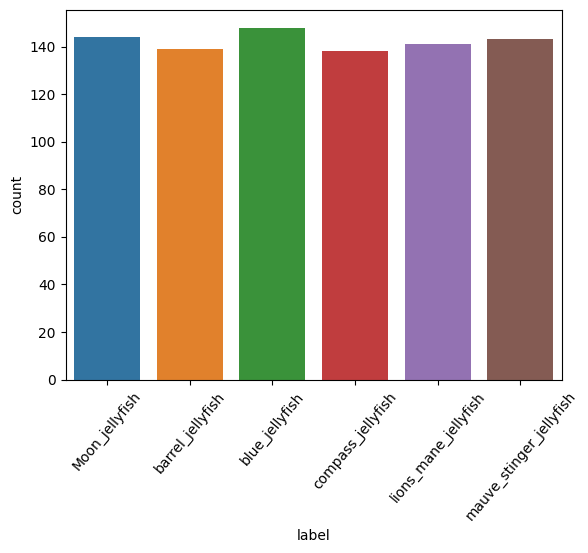

In [12]:
sns.countplot(x = df["label"])
plt.xticks(rotation = 50);

## Show images

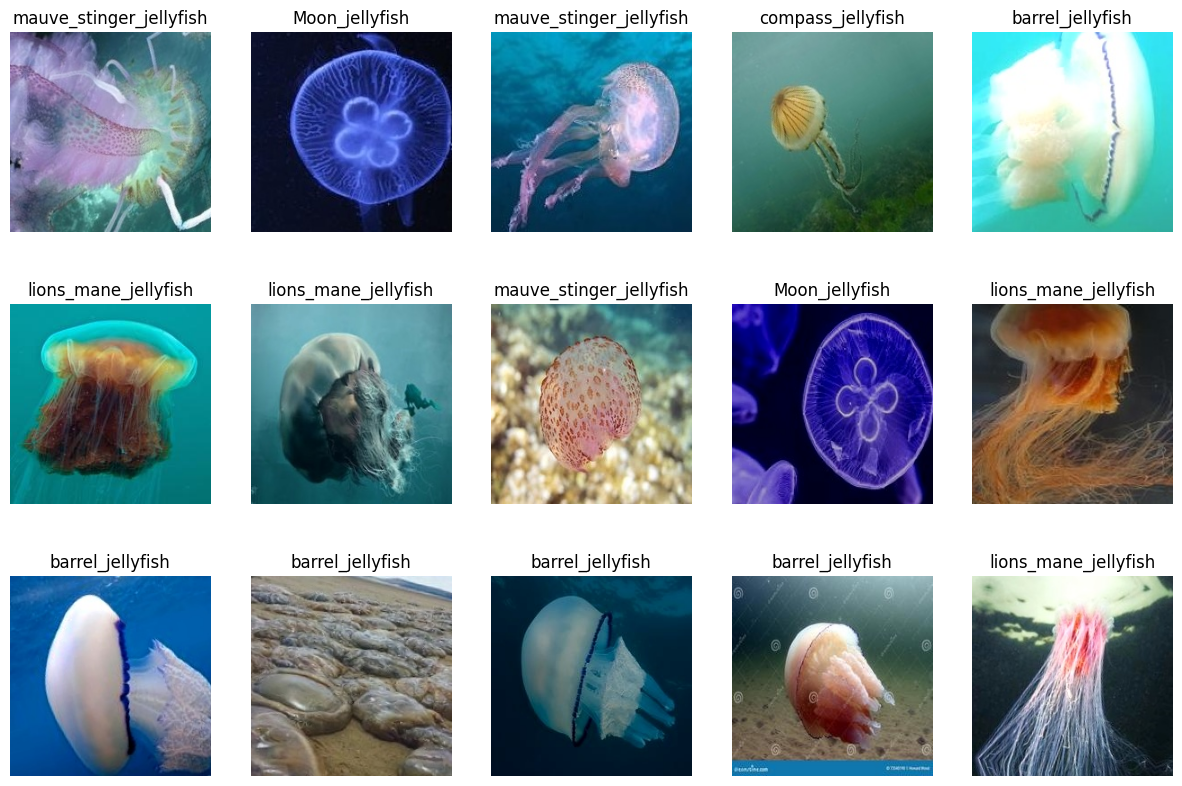

In [13]:
# 보여줄 이미지 수 설정
show_imgs = 15

# 데이터프레임에서 무작위 인덱스 선택
idx = np.random.randint(0, len(df), size=show_imgs)

# 이미지를 표시할 서브플롯 생성
fig, axes = plt.subplots(show_imgs // 5, 5, figsize=(15, 10))
axes = axes.flatten()

# 각 서브플롯에 이미지와 라벨을 시각화
for i, ax in enumerate(axes):
    full_path = df.loc[idx[i]]['path']  # 선택한 인덱스에 해당하는 이미지 파일 경로
    ax.imshow(plt.imread(full_path))  # 이미지를 읽어서 표시
    ax.set_title(df.loc[idx[i]]['label'])  # 이미지의 라벨을 서브플롯 제목으로 설정
    ax.set_axis_off()  # 축을 비활성화하여 이미지를 깔끔하게 표시

## Create datasets and dataloads

In [14]:
# 학습 데이터 변환 설정
train_transforms = v2.Compose([
    v2.Resize(256),  # 이미지 크기를 256x256으로 조절
    v2.RandomResizedCrop(size=(224, 224), antialias=True),  # 무작위로 잘라내어 크기를 224x224로 조절
    v2.RandomHorizontalFlip(p=0.5),  # 50% 확률로 좌우 반전
    v2.RandomVerticalFlip(p=0.5),  # 50% 확률로 상하 반전
    # v2.RandomRotation(degrees=(-20, 20)),  # -20도에서 20도 범위 내에서 무작위 회전 (주석 처리된 부분)
    v2.RandomAffine(degrees=(-10, 10), translate=(0.1, 0.1), scale=(0.9, 1.1)),  # 무작위 아핀 변환 적용
    v2.RandomErasing(p=0.5, scale=(0.1, 0.15)),  # 50% 확률로 무작위로 일부 영역을 지웁니다.
    v2.PILToTensor(),  # PIL 이미지를 텐서로 변환
    v2.ToDtype(torch.float32),  # 데이터 타입을 float32로 변환
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # 이미지를 정규화
])

# 테스트 데이터 변환 설정
test_transforms = v2.Compose([
    v2.Resize((224, 224)),  # 이미지 크기를 224x224로 조절
    v2.PILToTensor(),  # PIL 이미지를 텐서로 변환
    v2.ToDtype(torch.float32),  # 데이터 타입을 float32로 변환
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 이미지를 정규화
])

In [16]:
#import torch.utils.data.Dataset

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, transforms_):
        self.df = dataframe  # 데이터프레임을 저장하는 클래스 멤버 변수
        self.transforms_ = transforms_  # 데이터 변환을 위한 파이프라인을 저장하는 클래스 멤버 변수

    def __len__(self):
        return len(self.df)  # 데이터프레임의 길이를 반환하여 데이터셋의 크기를 정의

    def __getitem__(self, index):
        image_path = self.df.iloc[index]['path']  # 데이터프레임에서 이미지 파일 경로를 가져옴
        img = Image.open(image_path).convert("RGB")  # 이미지 파일을 열고 RGB로 변환하여 PIL 이미지 객체로 읽음
        transformed_img = self.transforms_(img)  # 이미지 변환 파이프라인을 적용하여 이미지를 변환
        class_id = self.df.iloc[index]['class_id']  # 데이터프레임에서 클래스 ID를 가져옴
        return transformed_img, class_id  # 변환된 이미지와 클래스 ID를 반환

In [17]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")  # GPU 사용 가능 여부에 따라 디바이스 선택
num_workers = 2 if device == 'cuda' else 4  # GPU를 사용할 경우 2개의 워커, 그렇지 않으면 4개의 워커 사용

# 데이터프레임을 학습 데이터와 검증 데이터로 나눔
train_df, val_df = train_test_split(df, test_size=0.2, random_state=9898)

# 학습 및 검증 데이터셋을 생성
train_dataset = MyDataset(train_df, train_transforms)  # 학습 데이터셋 생성
val_dataset = MyDataset(val_df, test_transforms)  # 검증 데이터셋 생성

BATCH_SIZE = 16  # 배치 크기 설정

# 데이터로더 설정
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  # 학습 데이터로더 설정
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)  # 검증 데이터로더 설정

In [18]:
print(f'train data:{len(train_df)}')
print(f'val data:{len(val_df)}')

train data:682
val data:171


## Create model

In [19]:
class_size = 6  # 클래스 수 설정

# EfficientNet 모델을 불러옵니다. 'DEFAULT' 가중치를 사용합니다.
model = models.efficientnet_v2_s(weights='DEFAULT')

# 모델의 출력 레이어를 클래스 수에 맞게 수정합니다.
model.classifier[1] = torch.nn.Linear(1280, class_size)

# 모델에 임의의 입력 데이터를 주입하여 출력의 형태를 확인합니다.
output_shape = model(torch.randn((16, 3, 224, 224))).shape

## Training and validation

In [20]:
def train(dataloader, model, loss_fn, optimizer, lr_scheduler):
    size = len(dataloader.dataset)  # 데이터셋의 샘플 수
    num_batches = len(dataloader)  # 에폭당 배치 수
    model.train()  # 모델을 학습 모드로 설정
    epoch_loss = 0.0  # 에폭별 손실 초기화
    epoch_correct = 0  # 에폭별 정확도 초기화

    for (data_, target_) in dataloader:
        target_ = target_.type(torch.LongTensor)  # 타겟 데이터 타입을 LongTensor로 변환
        data_, target_ = data_.to(device), target_.to(device)  # 데이터와 타겟을 지정한 디바이스로 이동

        # 옵티마이저의 캐시를 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(data_)

        # 손실 계산
        loss = loss_fn(outputs, target_)

        # 역전파
        loss.backward()

        # 모델 최적화
        optimizer.step()

        # 통계량 계산
        epoch_loss += loss.item()
        _, pred = torch.max(outputs, dim=1)
        epoch_correct += torch.sum(pred == target_).item()

    lr_scheduler.step()  # 학습률 스케줄러 업데이트
    return epoch_correct / size, epoch_loss / num_batches  # 정확도와 손실 반환


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)  # 데이터셋의 샘플 수
    num_batches = len(dataloader)  # 에폭당 배치 수
    epoch_loss = 0.0  # 에폭별 손실 초기화
    epoch_correct = 0  # 에폭별 정확도 초기화

    with torch.no_grad():
        # 이 설정은 역전파를 비활성화합니다.
        model.eval()  # 모델을 평가 모드로 설정
        for (data_, target_) in dataloader:
            target_ = target_.type(torch.LongTensor)  # 타겟 데이터 타입을 LongTensor로 변환
            data_, target_ = data_.to(device), target_.to(device)  # 데이터와 타겟을 지정한 디바이스로 이동

            # 순전파
            outputs = model(data_)

            # 손실 계산
            loss = loss_fn(outputs, target_)

            # 통계량 계산
            epoch_loss += loss.item()
            _, pred = torch.max(outputs, dim=1)
            epoch_correct += torch.sum(pred == target_).item()

    return epoch_correct / size, epoch_loss / num_batches  # 정확도와 손실 반환

In [21]:
model.to(device)  # 모델을 지정한 디바이스로 이동
EPOCHS = 50  # 에폭 수 설정

logs = {
    'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []
}

if os.path.exists('checkpoints') == False:
    os.mkdir("checkpoints")  # 체크포인트 디렉토리 생성

criterion = nn.CrossEntropyLoss()  # 손실 함수 설정

# 옵티마이저 설정
learning_rate = 0.0001
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # AdamW 옵티마이저 설정

# 학습률 스케줄러 설정
lr_milestones = [7, 14, 21, 28, 35]  # 학습률 변경 마일스톤 설정
multi_step_lr_scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=lr_milestones, gamma=0.1)

# 조기 종료 설정
patience = 5  # 조기 종료를 위한 기다릴 에폭 수 설정
counter = 0
best_loss = np.inf

for epoch in tqdm(range(EPOCHS)):
    # 학습 및 검증 수행
    train_acc, train_loss = train(train_loader, model, criterion, optimizer, multi_step_lr_scheduler)
    val_acc, val_loss = test(val_loader, model, criterion)

    # 에폭별 결과 출력
    print(f'EPOCH: {epoch} \
    train_loss: {train_loss:.4f}, train_acc: {train_acc:.3f} \
    val_loss: {val_loss:.4f}, val_acc: {val_acc:.3f} \
    lr: {optimizer.param_groups[0]["lr"]}')

    # 로그 기록
    logs['train_loss'].append(train_loss)
    logs['train_acc'].append(train_acc)
    logs['val_loss'].append(val_loss)
    logs['val_acc'].append(val_acc)

    torch.save(model.state_dict(), "checkpoints/last.pth")  # 마지막 모델 가중치 저장

    # 모델 성능 개선 확인
    if val_loss < best_loss:
        counter = 0
        best_loss = val_loss
        torch.save(model.state_dict(), "checkpoints/best.pth")  # 최적 모델 가중치 저장
    else:
        counter += 1

    # 조기 종료 검사
    if counter >= patience:
        print("Earlystop!")
        break

  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 0     train_loss: 1.5605, train_acc: 0.431     val_loss: 0.9913, val_acc: 0.784     lr: 0.0001


  2%|▏         | 1/50 [00:14<11:57, 14.65s/it]

EPOCH: 1     train_loss: 0.8233, train_acc: 0.767     val_loss: 0.4784, val_acc: 0.895     lr: 0.0001


  4%|▍         | 2/50 [00:28<11:24, 14.25s/it]

EPOCH: 2     train_loss: 0.5221, train_acc: 0.823     val_loss: 0.2963, val_acc: 0.924     lr: 0.0001


  6%|▌         | 3/50 [00:42<11:05, 14.16s/it]

EPOCH: 3     train_loss: 0.3595, train_acc: 0.887     val_loss: 0.2834, val_acc: 0.924     lr: 0.0001


  8%|▊         | 4/50 [00:56<10:47, 14.09s/it]

EPOCH: 4     train_loss: 0.2601, train_acc: 0.931     val_loss: 0.1835, val_acc: 0.953     lr: 0.0001


 10%|█         | 5/50 [01:11<10:52, 14.50s/it]

EPOCH: 5     train_loss: 0.2136, train_acc: 0.937     val_loss: 0.1900, val_acc: 0.965     lr: 0.0001


 12%|█▏        | 6/50 [01:26<10:41, 14.59s/it]

EPOCH: 6     train_loss: 0.2525, train_acc: 0.916     val_loss: 0.1741, val_acc: 0.965     lr: 1e-05


 14%|█▍        | 7/50 [01:40<10:23, 14.50s/it]

EPOCH: 7     train_loss: 0.1948, train_acc: 0.937     val_loss: 0.1582, val_acc: 0.959     lr: 1e-05


 16%|█▌        | 8/50 [01:55<10:06, 14.44s/it]

EPOCH: 8     train_loss: 0.1916, train_acc: 0.938     val_loss: 0.1698, val_acc: 0.959     lr: 1e-05


 18%|█▊        | 9/50 [02:09<09:46, 14.29s/it]

EPOCH: 9     train_loss: 0.1917, train_acc: 0.937     val_loss: 0.1478, val_acc: 0.971     lr: 1e-05


 20%|██        | 10/50 [02:23<09:31, 14.30s/it]

EPOCH: 10     train_loss: 0.1583, train_acc: 0.944     val_loss: 0.1427, val_acc: 0.971     lr: 1e-05


 22%|██▏       | 11/50 [02:37<09:18, 14.31s/it]

EPOCH: 11     train_loss: 0.2013, train_acc: 0.935     val_loss: 0.1529, val_acc: 0.965     lr: 1e-05


 24%|██▍       | 12/50 [02:51<09:01, 14.24s/it]

EPOCH: 12     train_loss: 0.1460, train_acc: 0.950     val_loss: 0.1412, val_acc: 0.971     lr: 1e-05


 26%|██▌       | 13/50 [03:06<08:50, 14.33s/it]

EPOCH: 13     train_loss: 0.1562, train_acc: 0.955     val_loss: 0.1473, val_acc: 0.971     lr: 1.0000000000000002e-06


 28%|██▊       | 14/50 [03:20<08:37, 14.37s/it]

EPOCH: 14     train_loss: 0.1577, train_acc: 0.950     val_loss: 0.1563, val_acc: 0.971     lr: 1.0000000000000002e-06


 30%|███       | 15/50 [03:35<08:19, 14.28s/it]

EPOCH: 15     train_loss: 0.1505, train_acc: 0.952     val_loss: 0.1520, val_acc: 0.965     lr: 1.0000000000000002e-06


 32%|███▏      | 16/50 [03:49<08:03, 14.21s/it]

EPOCH: 16     train_loss: 0.1435, train_acc: 0.955     val_loss: 0.1468, val_acc: 0.971     lr: 1.0000000000000002e-06


 34%|███▍      | 17/50 [04:03<07:46, 14.14s/it]

EPOCH: 17     train_loss: 0.1508, train_acc: 0.949     val_loss: 0.1437, val_acc: 0.977     lr: 1.0000000000000002e-06


 34%|███▍      | 17/50 [04:17<08:18, 15.12s/it]

Earlystop!


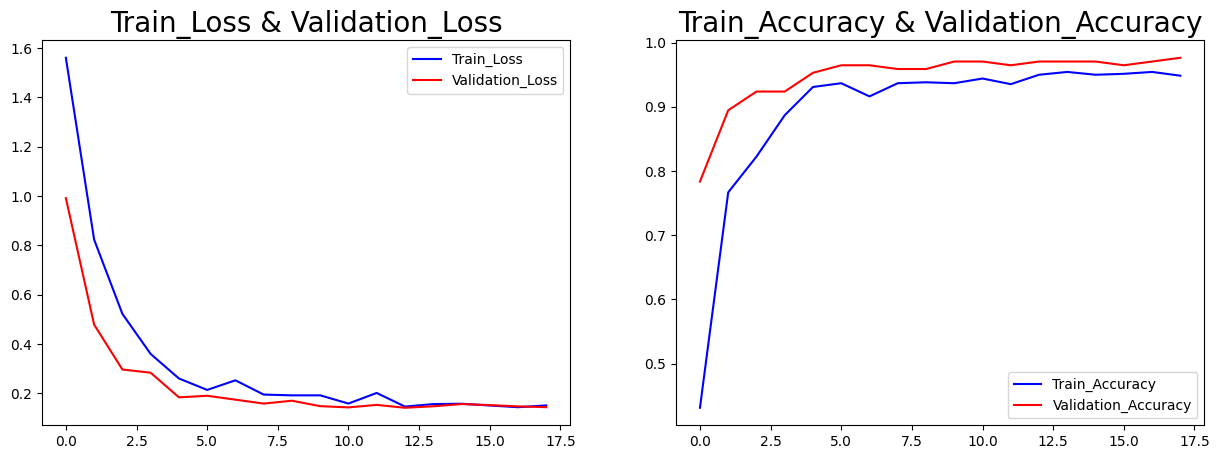

In [22]:
plt.figure(figsize=(15,5))  # 그래프 크기 설정

# 첫 번째 서브플롯: 학습 손실 및 검증 손실 그래프
plt.subplot(1,2,1)  # 1x2 그리드에서 첫 번째 서브플롯
plt.plot(logs['train_loss'], label='Train_Loss', color='blue')  # 학습 손실 그래프
plt.plot(logs['val_loss'], label='Validation_Loss', color='red')  # 검증 손실 그래프
plt.title('Train_Loss & Validation_Loss', fontsize=20)  # 그래프 제목 설정
plt.legend()  # 범례 표시

# 두 번째 서브플롯: 학습 정확도 및 검증 정확도 그래프
plt.subplot(1,2,2)  # 1x2 그리드에서 두 번째 서브플롯
plt.plot(logs['train_acc'], label='Train_Accuracy', color='blue')  # 학습 정확도 그래프
plt.plot(logs['val_acc'], label='Validation_Accuracy', color='red')  # 검증 정확도 그래프
plt.title('Train_Accuracy & Validation_Accuracy', fontsize=20)  # 그래프 제목 설정
plt.legend()  # 범례 표시

# 그래프 출력

## Metrics

In [23]:
# 저장된 모델 가중치를 로드하고 평가 모드로 설정합니다.
model.load_state_dict(torch.load('checkpoints/best.pth'))
model.eval()

# 정답과 예측 결과를 저장할 리스트를 초기화합니다.
y_true, y_pred = [], []

# torch.no_grad() 내에서 평가를 진행합니다.
with torch.no_grad():
    for (data_, target_) in tqdm(val_loader):  # val_loader에서 데이터를 가져옵니다.
        target_ = target_.type(torch.LongTensor)  # 타겟을 LongTensor 타입으로 변환합니다.
        data_, target_ = data_.to(device), target_.to(device)  # 데이터와 타겟을 GPU로 이동합니다.
        outputs = model(data_)  # 모델을 통해 데이터를 전달하여 출력을 얻습니다.
        _, pred = torch.max(outputs, dim=1)  # 출력 중 가장 큰 값의 인덱스를 예측으로 선택합니다.
        y_true.extend(target_.cpu().numpy())  # 실제 정답을 리스트에 추가합니다.
        y_pred.extend(pred.cpu().numpy())  # 예측 결과를 리스트에 추가합니다.

# 예측 결과를 NumPy 배열로 변환합니다.
y_pred = np.array(y_pred)
y_true = np.array(y_true)

100%|██████████| 11/11 [00:01<00:00,  9.05it/s]


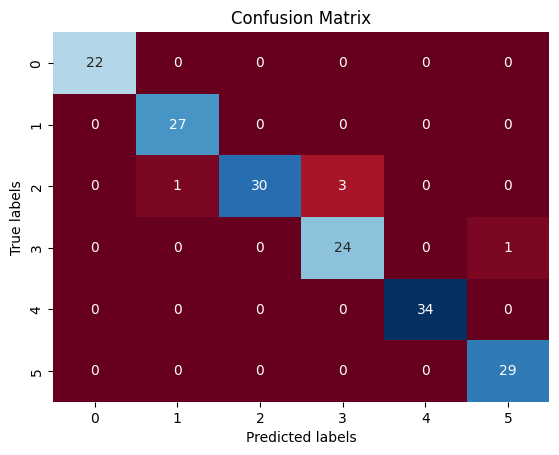

In [24]:
ax = plt.subplot()  # 서브플롯 생성

# 혼동 행렬 생성 및 시각화
CM = confusion_matrix(y_true, y_pred)  # 혼동 행렬 계산
sns.heatmap(CM, annot=True, fmt='g', ax=ax, cbar=False, cmap='RdBu')  # 히트맵으로 혼동 행렬 시각화
ax.set_xlabel('Predicted labels')  # x축 레이블 설정
ax.set_ylabel('True labels')  # y축 레이블 설정
ax.set_title('Confusion Matrix')  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [25]:
clf_report = classification_report(y_true, y_pred, target_names = label_list)
print(clf_report)

                         precision    recall  f1-score   support

         Moon_jellyfish       1.00      1.00      1.00        22
       barrel_jellyfish       0.96      1.00      0.98        27
         blue_jellyfish       1.00      0.88      0.94        34
      compass_jellyfish       0.89      0.96      0.92        25
   lions_mane_jellyfish       1.00      1.00      1.00        34
mauve_stinger_jellyfish       0.97      1.00      0.98        29

               accuracy                           0.97       171
              macro avg       0.97      0.97      0.97       171
           weighted avg       0.97      0.97      0.97       171



In [26]:
Acc = accuracy_score(y_true,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 97.076%


# 최종모델로 추가 데이터 분류하기

- 정확도 97.661%의 모델을 사용해서 추가확보한 jellyfish의 이미지들의 클래스를 분류하고 폴더별로 저장해 라벨링합니다.
- 정확도가 100%인 모델이 아니므로 임계값을 95%로 설정해서 모델이 클래스를 예측한 확률이 95%이상인 경우만 분류를 수행합니다.
  - 정확도 90%이상이지만 임계값 미만인 이미지들은 별도로 분류해 2차 분류를 시도합니다.
- 일부 데이터는 잘못된 분류로 라벨링이 될 수 있으나(산술적으로 5%정도) 현재 데이터셋의 볼륨이 너무 작기때문에 일부 오류를 감수해서라도 추가데이터를 확보하는 것이 더 중요하다 판단하여 진행함.
- 분류된 데이터에 대해 해당 모델로 분류를 재시도하여 2중으로 검증을 할 예정

In [27]:
import torch
import torchvision.transforms.functional as v2
from torchvision import datasets
from torch.utils.data import DataLoader
import shutil
import os
from tqdm import tqdm

# 데이터셋 로드 경로
base_path = '/content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish'
dataset_folders = ['val', 'test', 'train']
sub_folders = ['jellyfish', 'animal jellyfish']

# 모델 로드
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('checkpoints/best.pth'))
model.to(device)
model.eval()

# 분류할 클래스명
class_names = [
    'Moon_jellyfish',
    'barrel_jellyfish',
    'blue_jellyfish',
    'compass_jellyfish',
    'lions_mane_jellyfish',
    'mauve_stinger_jellyfish',
]

# 이미지 전처리 함수
def process_image(image_path):
    # 이미지 로드 및 전처리
    image = Image.open(image_path)
    image = v2.resize(image, [224, 224])
    image = v2.pil_to_tensor(image).float()  # 이미지를 float 텐서로 변환
    image = v2.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    return image



from tqdm import tqdm

def classify_and_save_images(dataset_path):
    class_counts = {class_name: 0 for class_name in class_names}
    reclassify_count = 0
    unsorted_count = 0

    for sub_path in tqdm(os.listdir(dataset_path), desc=f"Processing {dataset_path}"):
        full_path = os.path.join(dataset_path, sub_path)
        if os.path.isdir(full_path):
            continue

        image = process_image(full_path)
        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(image)
            probabilities, preds = torch.max(outputs, 1)
            max_prob = torch.nn.functional.softmax(outputs, dim=1)[0][preds[0]].item()

            # 예측 확률에 따른 분류
            if max_prob >= 0.95:
                dest_folder = f"{dataset_path}/{class_names[preds[0]]}"
                class_counts[class_names[preds[0]]] += 1
            elif 0.90 <= max_prob < 0.95:
                dest_folder = f"{dataset_path}/Reclassify"
                reclassify_count += 1
            else:
                dest_folder = f"{dataset_path}/Unsorted"
                unsorted_count += 1

            # 예측 결과와 확률 출력
            print(f"{sub_path}: {class_names[preds[0]]} with probability {max_prob*100:.2f}%")

            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)

            shutil.move(full_path, dest_folder)

    # 분류 요약 정보 출력
    print(f"Class Counts for {dataset_path}:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")
    print(f"Reclassify Count: {reclassify_count}")
    print(f"Unsorted Count: {unsorted_count}")

# 각 데이터셋과 하위 폴더에 대해 이미지 분류 및 저장
for folder in dataset_folders:
    for sub_folder in sub_folders:
        dataset_path = f"{base_path}/{folder}/{sub_folder}"
        classify_and_save_images(dataset_path)

Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/val/jellyfish: 100%|██████████| 8/8 [00:00<00:00, 4767.61it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/val/jellyfish:
Moon_jellyfish: 0
barrel_jellyfish: 0
blue_jellyfish: 0
compass_jellyfish: 0
lions_mane_jellyfish: 0
mauve_stinger_jellyfish: 0
Reclassify Count: 0
Unsorted Count: 0


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/val/animal jellyfish: 100%|██████████| 48/48 [00:17<00:00,  2.69it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/val/animal jellyfish:
Moon_jellyfish: 2
barrel_jellyfish: 0
blue_jellyfish: 0
compass_jellyfish: 1
lions_mane_jellyfish: 2
mauve_stinger_jellyfish: 1
Reclassify Count: 2
Unsorted Count: 36


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/test/jellyfish: 100%|██████████| 390/390 [00:16<00:00, 23.67it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/test/jellyfish:
Moon_jellyfish: 24
barrel_jellyfish: 3
blue_jellyfish: 27
compass_jellyfish: 25
lions_mane_jellyfish: 5
mauve_stinger_jellyfish: 5
Reclassify Count: 45
Unsorted Count: 256


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/test/animal jellyfish: 100%|██████████| 170/170 [00:08<00:00, 21.03it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/test/animal jellyfish:
Moon_jellyfish: 10
barrel_jellyfish: 1
blue_jellyfish: 9
compass_jellyfish: 11
lions_mane_jellyfish: 1
mauve_stinger_jellyfish: 4
Reclassify Count: 15
Unsorted Count: 119


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/train/jellyfish: 100%|██████████| 1340/1340 [01:01<00:00, 21.93it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/train/jellyfish:
Moon_jellyfish: 49
barrel_jellyfish: 13
blue_jellyfish: 64
compass_jellyfish: 61
lions_mane_jellyfish: 9
mauve_stinger_jellyfish: 43
Reclassify Count: 109
Unsorted Count: 992


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/train/animal jellyfish: 100%|██████████| 560/560 [00:26<00:00, 21.40it/s]

Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/train/animal jellyfish:
Moon_jellyfish: 14
barrel_jellyfish: 1
blue_jellyfish: 18
compass_jellyfish: 37
lions_mane_jellyfish: 6
mauve_stinger_jellyfish: 19
Reclassify Count: 48
Unsorted Count: 417
